General Pandas tutorial on basic functions

This tutorial was presented by Kevin Markham at PyCon on May 10, 2018.

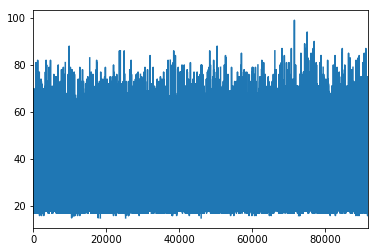

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
ri = pd.read_csv('police.csv')
ted = pd.read_csv('ted.csv')
ri.driver_age.plot()
plt.show()

Display part of the data. Should investigate the missing values.

In [13]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


Numbers of rows x number of colums

In [25]:
rows, col = ri.shape
print('There are {0} rows in the dataset with {1} colums'.format(rows, col))

There are 91741 rows in the dataset with 15 colums


Data Types in the dataset

In [17]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

These numbers are the sums of all null values of each colum. This represents the count of missing data in each colum. The following line of code works by returning a dataframe of true and false values. From this you can take the sum of the data frame and it collapses the data over the zero axis. You reduce the dimensionality and translate false and true to 0 and 1.

In [26]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

## 1.Remove the column that only contains missing values

In [30]:
# use a dataframe method for this
# Parameters to specify are axis and inplace
# inplace allows you to save the changes to the dataframe ri

ri.drop('county_name', axis='columns', inplace=True)

Always check you dataframe after having manipulated it

In [32]:
print(ri.shape)
ri.columns

(91741, 14)


Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

An alternative dataframa method we could have used is the 'ri.dropna(..)' method like so, 
```python
ri.dropna(axis='columns', how='all')
jdj
```
This will remove the columns with all rows as 'na'

## 2. Do men or women speed more often?

### pay attention to driver_gender, violation

One way of trying to answer this question is by looking for **how often do people get stop for speeding 
violations and out of those how
many are females.**

In [40]:
#ri.apply('driver_gender'.value_counts) 

# filter for speeding and then select the driver gender column and count the values
ri[ri.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [41]:
# for percentages

ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

**For all speeding violations, 68% of these are males and 32% are females.**

Alternatively, you can also flip your thinking process and aks **when a man is pulled over how often is it for speeding and likewise for a woman.**

In [43]:
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [44]:
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

Interestingly enough in the second case of thinking woman are stopt by the police more often for speeding. **Among males  they are stop for speeding on 52% of the time while females are stopt 66% of the time for speeding.**

There is no clear answer for the question however, here is a pandas specific question: How can we put all the previous line of code into a single line?

In [45]:
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [46]:
ri.groupby('violation').driver_gender.value_counts(normalize=True)

violation            driver_gender
Equipment            M                0.774319
                     F                0.225681
Moving violation     M                0.802515
                     F                0.197485
Other                M                0.840167
                     F                0.159833
Registration/plates  M                0.704837
                     F                0.295163
Seat belt            M                0.784892
                     F                0.215108
Speeding             M                0.680527
                     F                0.319473
Name: driver_gender, dtype: float64

To answer the question more specifically we need more data. We miss crucial data on how many people (men or woman in total) are driving in Rhode Island for example or how many miles these people drove. The data we have now is also biased towards only people that are pulled over. There are people that might only speed for a few minutes for example.

The previous code returns a a series with a multi index. Thus, you can select out of that with loc[:] function.

In [47]:
ri.groupby('driver_gender').violation.value_counts(normalize=True).loc[:, 'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

By unstacking the series to a frame you can return a dataframe object like so,

In [51]:
ri.groupby('driver_gender').violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


## 3. Does gender affect who gets searched during a stop?

### driver_gender, search_conducted

This means that in Rhode Island within this dataset, out of every 100 people that were stopped about 3.5% of 
them had a search conducted of their vehicle.


In [59]:
ri.groupby('search_conducted').driver_gender.value_counts(normalize=True)

search_conducted  driver_gender
False             M                0.723110
                  F                0.276890
True              M                0.852628
                  F                0.147372
Name: driver_gender, dtype: float64

In [60]:
ri.groupby('driver_gender').search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: search_conducted, dtype: float64

## You should have started with the simple go to filtering of the most important colum when we forget about gender.

In [62]:
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [67]:
ri.search_conducted.mean()

0.03483720473942948

Why do we get the same number as when we count the values above? This is so because of the fact that True is represented 
by 1 and false have a value of 0. Thus, when you take the mean of a series of 1 and 0 you get the percentage of time the
counts are 1 (True). In other words you should do a value count over a boolean column to get the percentages of one's with mean or do a sum to get the value of one's.

In [70]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

For each gender! Everytime you hear groupby think of it in terms of 'for each'

It's preferable t get the mean of the true value for search conducted. This can be done with groupby.

In [72]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

## Does this proof that gender affects who gets stopt and searched?

### All we have looked at here is at gender. We don't have enough information to say something about 'why' they were searched.

You can groupby fo more than one column and you can test the idea if males get more violations overall than woman.

In [73]:
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

It appears that man get into more violations overall in almost each category.

## This still does not prove causation. For this you would need to do more research about the topic. 
*Causation is difficult to proof and therefore, as a data scientist you should focus and speak more in terms of relationships*

## 4. Why is data on search_type missing so often?

In [76]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

It is possibe since only a small percentage of the total cars on the road would be stopped and a search would be conducted.
In other words, we think that in 88 thousand times there was no search done and why the value is missing. How can we check this?

In [79]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

We have good evidence that everytime there is no search done the search_type value is missing.

In [80]:
ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Frisk                                    11
Incident to Arrest,Invent

The search type values correspont to all the different categories of search that can be conducted.

*Why is the following code an empty series?*

Well it is because we are filtering for False values in a column that have no such values. By default na values are dropped.

In [82]:
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [84]:
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [85]:
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Inventory,Protective Frisk                                     11
Protective

**Thus, pandas ignores missing values by default.**

## 5. During a search, how often is the driver frisked?

It is important to notice that drivers can be frisked for different reasons. There could be different types of frisks as well but this is not the case.

You would need to use a method that allows you to search within a string here. There are also pandas string methods that can be applied across the entire pandas series. This is a string method that automatically applies to every element of the series.

In [88]:
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [90]:
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

**We can see that the string keeps the NaN values. In other words, the comparison is made but the function still returns NaN and not a False value**

In [91]:
ri.frisk.sum()

274

In [92]:
ri.frisk.mean()

0.08573216520650813

In [94]:
274 / (2922 + 274)

0.08573216520650813

*So, we can say that in 8.5% of the time, when there is a search there is a frisk.*

If you notice that you have a very small percentage, then you might be calculating the mean across all rows. The important thing is to remember that we are interested on the cases were there is a search. Thus, the missing values should be excluded.

** Always think about the results you get and try to put in into real world context. Otherwise, if you feeling some numbers might be weird, check your code.**

# 6. Which year had the least number of stops?

In [100]:
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

Why is the year 0f 2015 number is so low?

There are allot of reasons but if you might consider to exclude it since it can be a biased example. 
If you opt to exclude it you should do so only for a good reason.

In [103]:
# concatenate stop_date and stop_time into one string series but separated by a space.
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined.head(5)

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [105]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [107]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

*We can see how datetime is a different datatype*

In [110]:
# just like string methods have a dot something method with attributes datetime also has these
ri.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005

Very useful to use datetime data type for dates and times.

## 7. How does drug activity change by time of day?

### stop_datetime, drugs_related_stop

In [116]:
#ri.groupby('drugs_related_stop').stop_datetime.dt.hour.value_counts()

ri.drugs_related_stop.dtype

dtype('bool')

**Remember, when you have a bool column and you want to know the rate of something you can take the mean of the column.**

The mean of the drugs_related_stop tells you what percentage of time when there is a stop it is drugs related.

In [117]:
ri.drugs_related_stop.mean()

0.008883705213590434

You can interpret the questions in different ways. One way is 'for each hour, what is the rate of drug related stops?'. 

For this we first need to create a column with the hours. We don't have this so we can do it instead with the following code.

In [119]:
#ri.groupby('hour').drugs_related_stop.mean()

ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

You can plot the data above easily by adding a .plot to the end of the code.

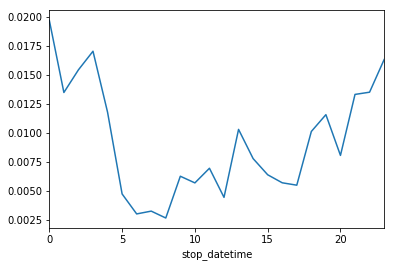

In [120]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

It looks that in rough terms the rate of drug related stops goes down during the day, increases during the night and drops sharply in the early a.m. hours. The . plot() works since we are using jupyter otherwise you should do a plt.show().

An alternative way to analyse the data is by looking at time. This would be a little harder to understand but would be more detailed.

Create exploratory plots with this pandas one liners to save time rather than writing the full plot code.

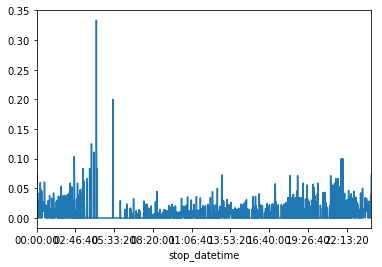

In [127]:
ri.groupby(ri.stop_datetime.dt.time).drugs_related_stop.mean().plot()

Alternatively, instead of using the rate you can also do a count. There are definately different solutions to find the answer the question. You could argue that a count is more relevant since this takes the number according to how many people are on the road at that specific time and if they were stopped what is the rate that it would be drug_related. The mean tells you that for a given police officer up at a given time what is the rate of stops at a given time.

## 8. Do most stops occur at night?

In [128]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'frisk', 'stop_datetime'],
      dtype='object')

You can take the datetime attribut hour and apply a count to this.

In [133]:
ri.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

We can apply what we just learn and add a .plot() at the end of the code. However, this is not the right way to plot the data in this case. We first need to sort the index or hour. Since, value_counts outputs a series. These have two methods for sorting - sort index and sort values. You will need to sort it to make the plot look nice since pandas does not automatically sort a series for you.

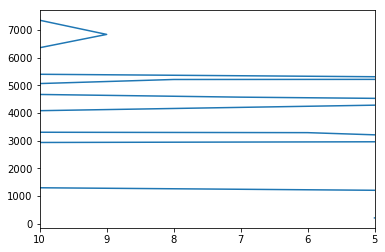

In [134]:
ri.stop_datetime.dt.hour.value_counts().plot()

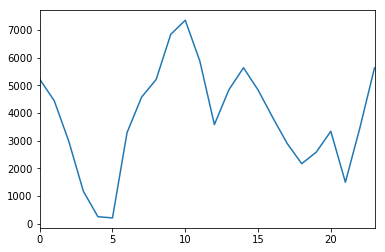

In [136]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

It seems that most stops occur during the day but this depends on how you define 'night' to be. Alternatively, you can first define what night is and sort for that.

In [139]:
ri[(ri.stop_datetime.dt.hour > 4) & (ri.stop_datetime.dt.hour < 22)].shape
# with multiple conditions you need paranthesis otherwise you should remove them
# If you going to use the ri.stop_datetime.dt.hour multiple times it would be better to create a column for this

(68575, 16)

In [140]:
ri.shape

(91741, 16)

The code returns a dataframe. If we compare the shape to the entire dataset we see that the majority of stops indeed is during the day since we define the day to be > 4, < 22.

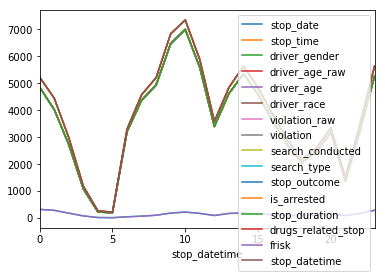

In [141]:
# example
ri.groupby(ri.stop_datetime.dt.hour).count().plot()
# You should choose a column with no missing values to get the correct plot.

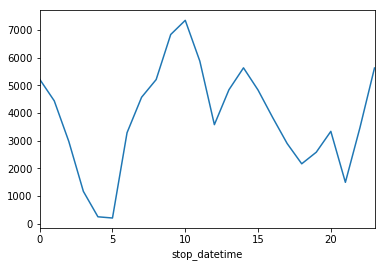

In [142]:
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

If you had three categories such as, daytime, evening and night you could show the number of stops for each category. You would have to map the number of hours for each category. The you could use a bar plot better for this.

The important part is to remember that sorting is not by default.

## 9. FInd the bad data in the stop_duration column and fix it

First thing to address is, what counts as bad data?

In [146]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

The na values do not always count towards missing data. Depending on what you want to do with the data you should think about this carefully. For this exercise it is more important to investigate the 1 and 2 values that appear with a count of 1 in the column. These coud be hours since the rest are in minutes. However, there are only 1 of each so this might be probable erroneous data which is the most accurate definition of bad data. These could be misstypes or other errors.

What should we do to fix this? There are different ways. One way is to assume they are hours and change the values to minutes. But then you should put them in the 30+ minutes and not just change the hours to minutes. Alternatively, you could remove the rows or replace the data to something else. *The most common strategy is to set these values as missing.*

You make many choices when working with data so the most important thing is to document it to make it reproducable when someone makes an analysis on the same data.

How can we set the values to NaN values? One way is to use the replace method. Alternatively, you can use...

Something like the following assignment statement:

```python ri[ri.stop_duration == 1 | ri.stop_duration == 2].stop_duration = 'NaN'```

But there are 4 things wrong with this code. 

-NaN are not strings 

-there is no parenthesis for the multiple conditions 

-the 1 and 2 are not numbers but strings

-the code will return a warning

In [147]:
ri.stop_duration.dtype # this code tells you there are no integers in the column

dtype('O')

In [149]:
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'

C:\Users\marti\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In some cases you can ignore warnings however, in this case you should not ignore this.

**Do not ignore SettingWithCopyWarning**

Did the operation work? Since its not an error?

No, the assignment statement happen but it got trown away evethough it is a warning and not an error.

In [150]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [151]:
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

*The loc attribute will fix the warning!*

In [152]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [153]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

Now we have two NaN's. So we created NaN as strings and created some confusion.

You can fix this with numpy.

In [155]:
import numpy as np

ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [157]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

You can try and investigate if the folling code would change to columns at the same time but we already changed the stop_duration column.

```python ri.loc[ri.stop_duration == 'NaN', ['stop_duration', 'stop_date']] = np.nan```

The answer is yes!